In [150]:
import jrpyoop
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
class Cohort:
    def __init__(self, weights, heights, centre):
        self.data = pd.DataFrame({'heights': heights, 'weights': weights})
        self.centre = centre
    
    def plot(self):
        self.data.plot.scatter(
            x = 'weights',
            y ='heights',
            title = self.centre
        )
        
    def __str__(self):
        return '\nData from centre : {} \n \n {}',format(
            self.centre,
            self.data.__str__()
        )

In [49]:
heights = [1,2,3,4]
weights = [3,4,5,6]
centre = 'NewCastle'

In [50]:
myCohort = Cohort(weights,heights, centre)

In [51]:
myCohort.__str__

<bound method Cohort.__str__ of <__main__.Cohort object at 0x0000000011675278>>

In [52]:
myCohort.data

,heights,weights
0,1,3
1,2,4
2,3,5
3,4,6


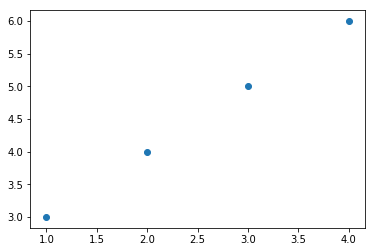

In [53]:
plt.scatter(myCohort.data.heights, myCohort.data.weights)

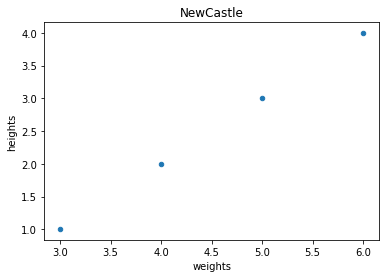

In [54]:
myCohort.plot()

In [59]:
jrpyoop.vignettes.load_vignette('practical1.pdf')

In [60]:
from sklearn.datasets import load_boston
boston = load_boston()

In [156]:
X, y = boston.data, boston.target

In [157]:
X.shape

(506, 13)

In [158]:
class Model:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        if len(X.shape) == 1:
            X = X.values.reshape(-1,1)
        X = np.c_[np.ones(X.shape[0]),X]
        xTx = np.dot(X.T,X)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X.T,y)
        coef = np.dot(inverse_xTx,xTy)
        self.intercept = coef[0]
        self.gradients = coef[1:]
        self.fitted = self.predict(self.X)
        self.residuals = self.fitted - self.y
        
    def predict(self,X):
        if len(X.shape) == 1:
            X = X.values.reshape(-1,1)
        return self.intercept + np.dot(X,self.gradients)
    
    def __str__(self):
        return 'A linear regression model with parameters \n \
        \n Intercept: {} \
        \n Gradients: {}'.format(self.intercept, self.gradients)
    
    def __repr__(self):
        return self.__str__()
    

In [159]:
class plottableModel(Model):
    def plot_one(self,dim = 0):
        cols = self.X.shape[1]
        if dim > (cols - 1):
            raise Exception('You chose column {} (index {}) but there are \
            only {} columns to choose from.'.format(dim-1,dim,cols))

        df = self.X.assign(y = self.y, fitted = self.fitted)
        df.sort_values(df.columns[dim],inplace = True)
        p = df.plot.scatter(x=dim,y = 'y')
        df.plot.line(x = dim, y = 'fitted', ax = p, c = 'black')
        plt.show()
            
    @classmethod
    def make_plottable(cls,m):
        return cls(m.X,m.y)

In [139]:
myModel = Model(X,y)

In [160]:
plot_clas = plottableModel(pd.DataFrame(X),y)

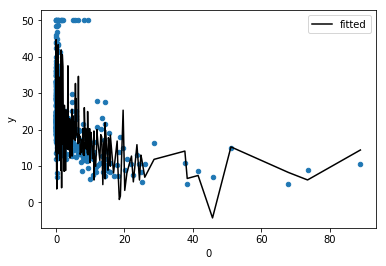

In [161]:
plot_clas.plot_one()

In [148]:
plot_clas.make_plottable(myModel)

A linear regression model with parameters 
         
 Intercept: 36.45948838510185         
 Gradients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]